In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [8]:
#create data frame to read data set
df= pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/bank_additional_data.csv')

In [9]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [10]:
#check the df structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2999 entries, 0 to 2998
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2999 non-null   int64  
 1   job             2999 non-null   object 
 2   marital         2999 non-null   object 
 3   education       2999 non-null   object 
 4   default         2999 non-null   object 
 5   housing         2999 non-null   object 
 6   loan            2999 non-null   object 
 7   contact         2999 non-null   object 
 8   month           2999 non-null   object 
 9   day_of_week     2999 non-null   object 
 10  duration        2999 non-null   int64  
 11  campaign        2999 non-null   int64  
 12  pdays           2999 non-null   int64  
 13  previous        2999 non-null   int64  
 14  poutcome        2999 non-null   object 
 15  emp.var.rate    2999 non-null   float64
 16  cons.price.idx  2999 non-null   float64
 17  cons.conf.idx   2999 non-null   f

In [11]:
#find number of rows and columns
df.shape

(2999, 21)

In [12]:
#describe df numerical columns
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000
mean,39.889296,255.085028,2.526842,962.227743,0.192064,0.079093,93.584553,-40.578226,3.605769,5165.642314
std,10.282229,256.265737,2.556995,187.599866,0.551960,1.559126,0.581162,4.594237,1.739625,74.384632
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000
25%,32.000000,101.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.876000,-41.800000,4.857000,5191.000000
75%,47.000000,316.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [13]:
for col in df.select_dtypes(include='object').columns:
    print(col)
    print(df[col].unique())

job
['blue-collar' 'services' 'admin.' 'entrepreneur' 'self-employed'
 'technician' 'management' 'student' 'retired' 'housemaid' 'unemployed'
 'unknown']
marital
['married' 'single' 'divorced' 'unknown']
education
['basic.9y' 'high.school' 'university.degree' 'professional.course'
 'basic.6y' 'basic.4y' 'unknown']
default
['no' 'unknown']
housing
['yes' 'no' 'unknown']
loan
['no' 'unknown' 'yes']
contact
['cellular' 'telephone']
month
['may' 'jun' 'nov' 'sep' 'jul' 'aug' 'mar' 'oct' 'apr' 'dec']
day_of_week
['fri' 'wed' 'mon' 'thu' 'tue']
poutcome
['nonexistent' 'failure' 'success']
y
['no' 'yes']


In [14]:
features:

Variable: Definition
ID: Unique client ID
age: Age of the client
job: Type of job
marital: Marital status of the client
education: Education level
default: Credit in default.
housing: Housing loan
loan: Personal loan
contact: Type of communication
month: Contact month
day_of_week: Day of week of contact
duration: Contact duration
campaign: number of contacts performed during this campaign to the client
pdays: number of days that passed by after the client was last contacted
previous: number of contacts performed before this campaign
poutcome: outcome of the previous marketing campaign
    
    
Labels:
Subscribed (target): has the client subscribed a term deposit? (YES/NO)
 



SyntaxError: invalid syntax (226510297.py, line 1)

# Explore Data Analysis

In [15]:
#find missing values
features_na = [features for features in df.columns if df[features].isnull().sum() >0]
for features in features_na:
      print(feature, np.round(df[feature].isnull().mean(), 4), '% missing values' )
else:
    print("No missing value found")

No missing value found


Find feature with one variable

In [16]:
for column in df.columns:
    print(column,df[column].nunique())

age 65
job 12
marital 4
education 7
default 2
housing 3
loan 3
contact 2
month 10
day_of_week 5
duration 739
campaign 24
pdays 16
previous 7
poutcome 3
emp.var.rate 10
cons.price.idx 26
cons.conf.idx 26
euribor3m 221
nr.employed 11
y 2


# Find Categorical feature Distribution

In [17]:
categorical_features=df.select_dtypes
categorical_features

<bound method DataFrame.select_dtypes of       age          job  marital          education  default  housing     loan  \
0      30  blue-collar  married           basic.9y       no      yes       no   
1      39     services   single        high.school       no       no       no   
2      25     services  married        high.school       no      yes       no   
3      38     services  married           basic.9y       no  unknown  unknown   
4      47       admin.  married  university.degree       no      yes       no   
...   ...          ...      ...                ...      ...      ...      ...   
2994   47  blue-collar   single           basic.9y  unknown       no       no   
2995   53       admin.  married  university.degree       no       no      yes   
2996   60      retired  married  university.degree       no      yes       no   
2997   32   technician   single  university.degree       no       no       no   
2998   67      retired  married           basic.4y       no       no

In [18]:
categorical_features=df.select_dtypes(include='object')
categorical_features.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,nonexistent,no
1,services,single,high.school,no,no,no,telephone,may,fri,nonexistent,no
2,services,married,high.school,no,yes,no,telephone,jun,wed,nonexistent,no
3,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,nonexistent,no
4,admin.,married,university.degree,no,yes,no,cellular,nov,mon,nonexistent,no


In [19]:
print(categorical_features.columns)
print('Total number of categories are '+str(len(categorical_features.columns)) +'-')

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')
Total number of categories are 11-


In [20]:
categorical_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2999 entries, 0 to 2998
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   job          2999 non-null   object
 1   marital      2999 non-null   object
 2   education    2999 non-null   object
 3   default      2999 non-null   object
 4   housing      2999 non-null   object
 5   loan         2999 non-null   object
 6   contact      2999 non-null   object
 7   month        2999 non-null   object
 8   day_of_week  2999 non-null   object
 9   poutcome     2999 non-null   object
 10  y            2999 non-null   object
dtypes: object(11)
memory usage: 257.9+ KB


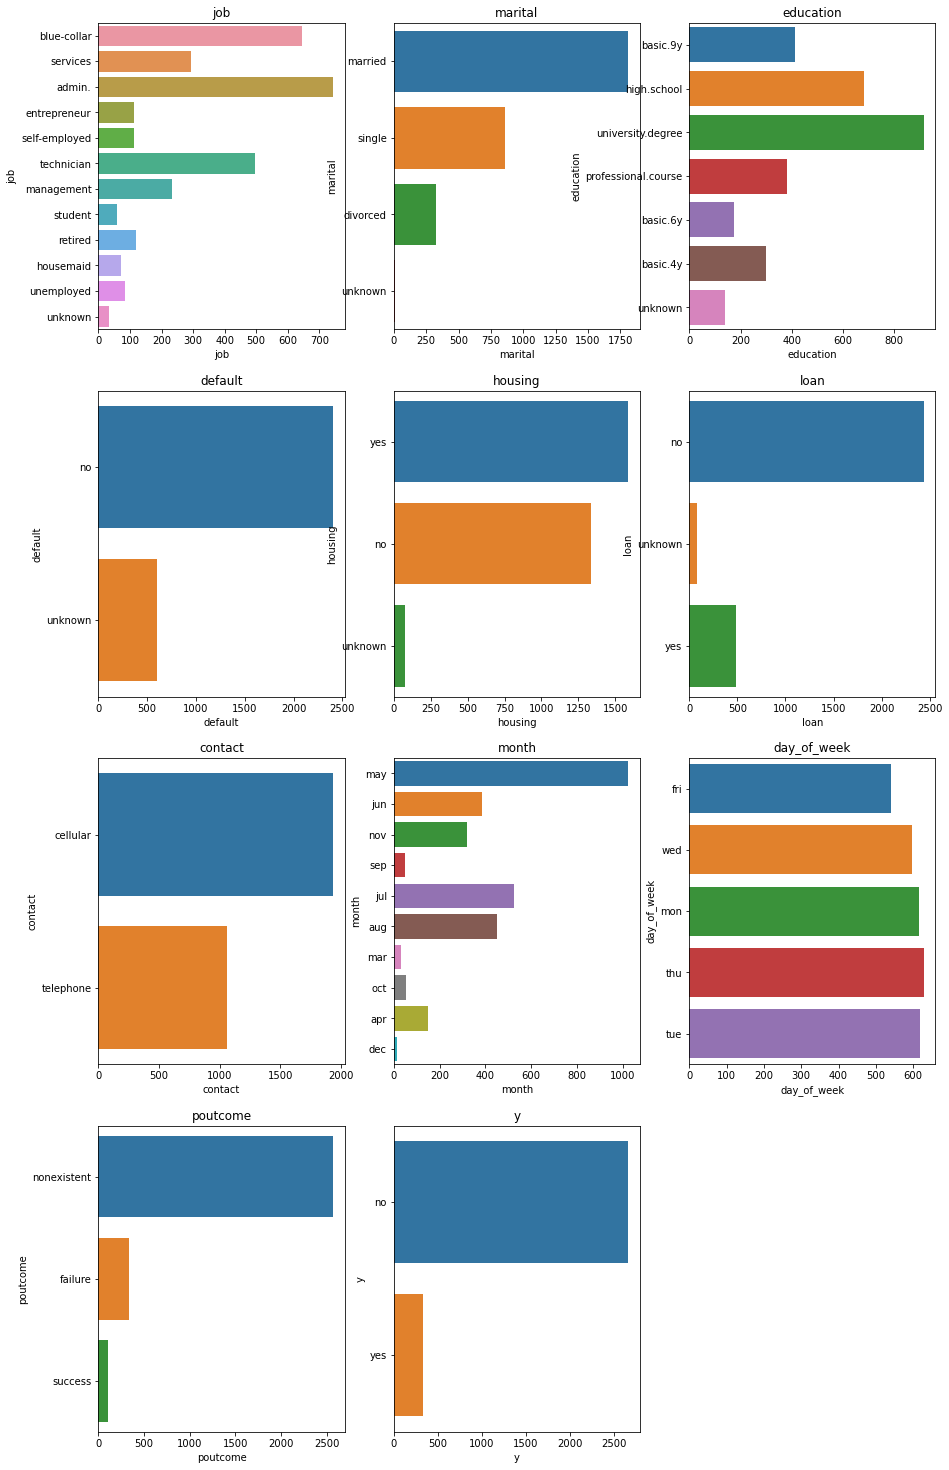

In [21]:
#check count based on categorical features
plt.figure(figsize=(15,80), facecolor='white')
plotnumber =1
for categorical_feature in categorical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.countplot(y=categorical_feature,data=df)
    plt.xlabel(categorical_feature)
    plt.title(categorical_feature)
    plotnumber+=1
plt.show()    

# Relationship between Categorical Features and Label

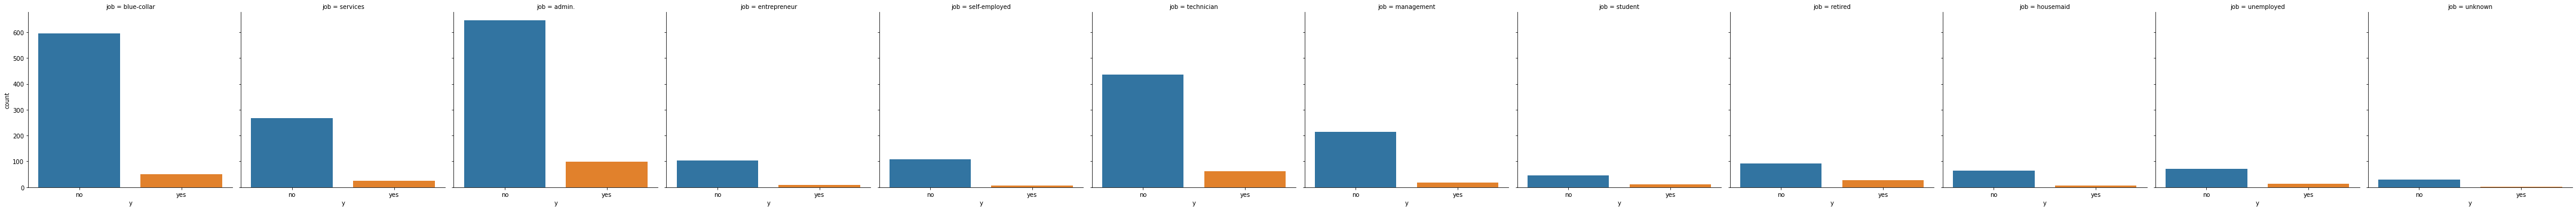

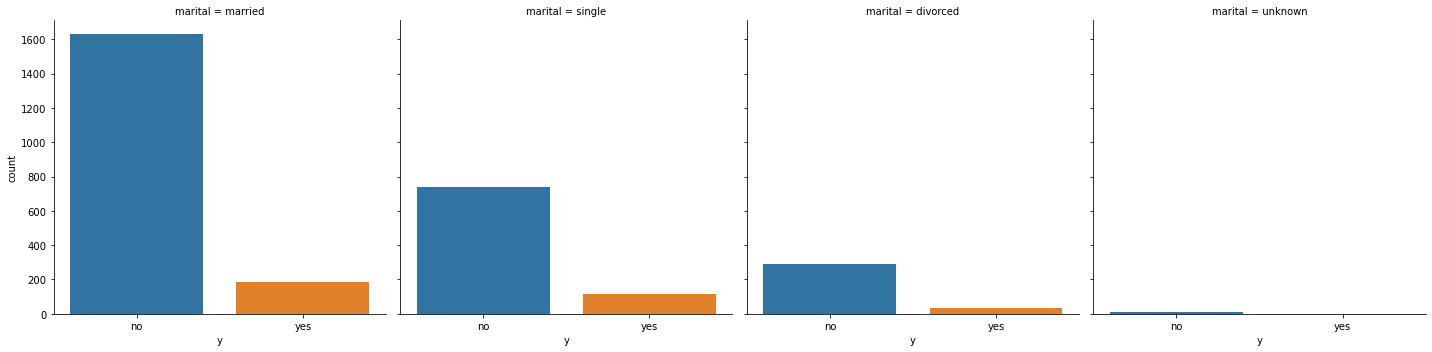

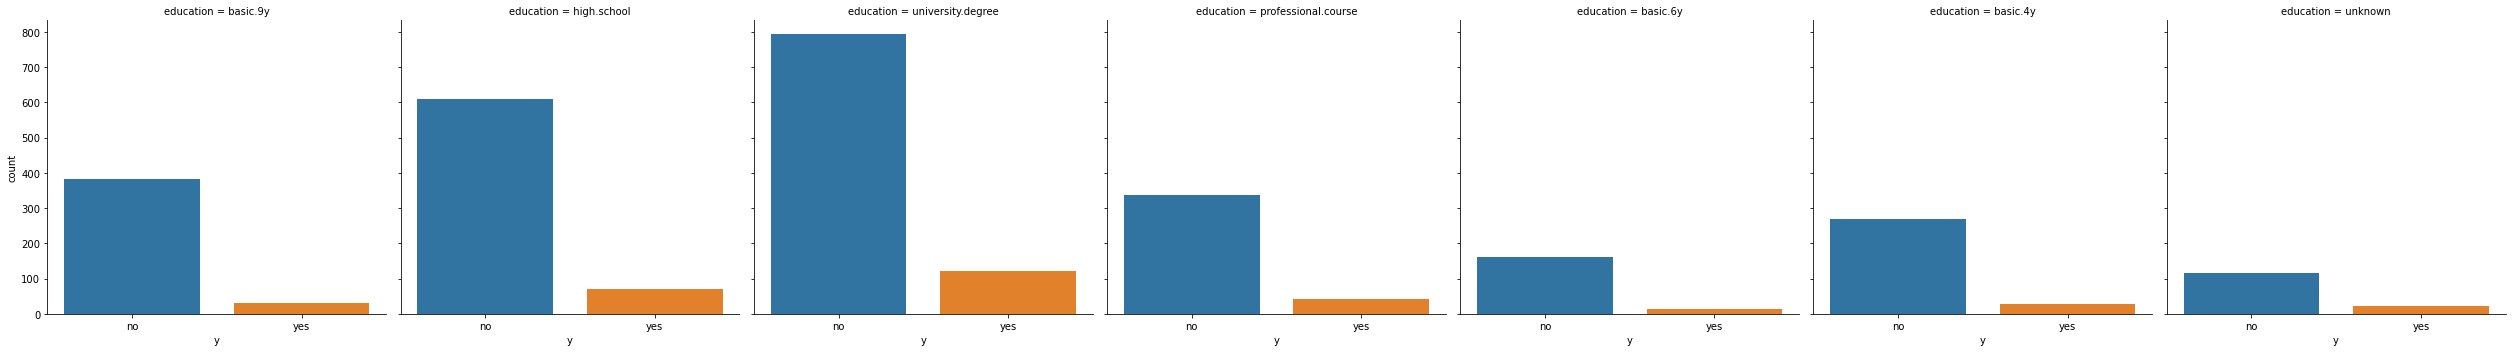

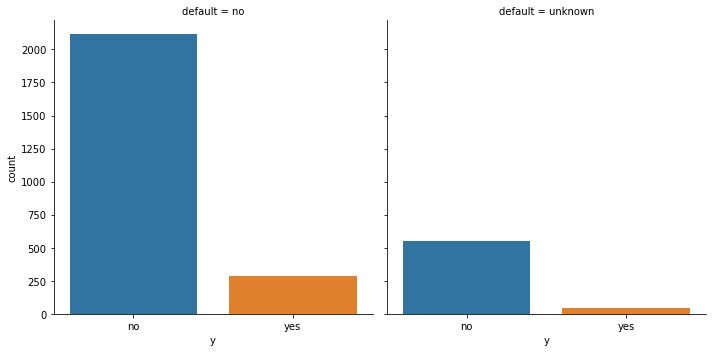

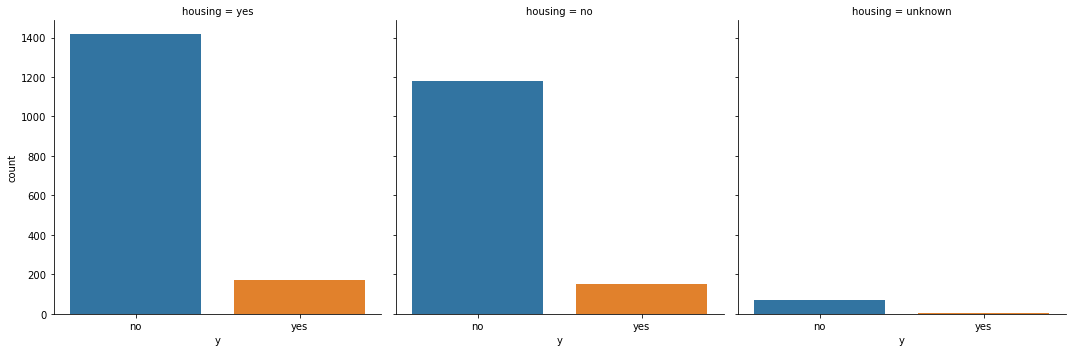

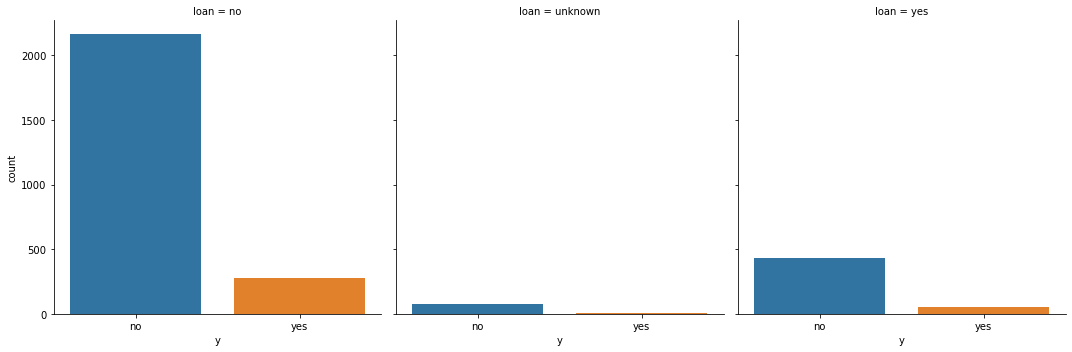

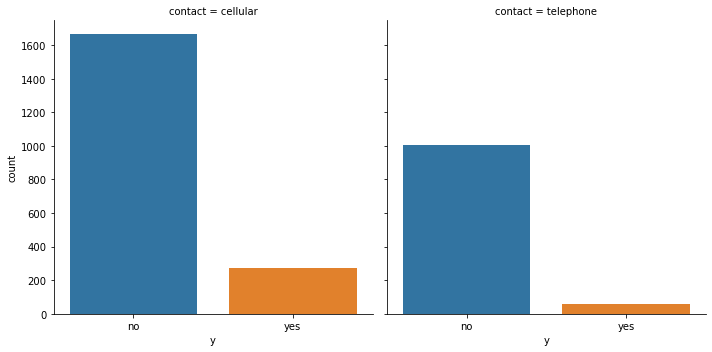

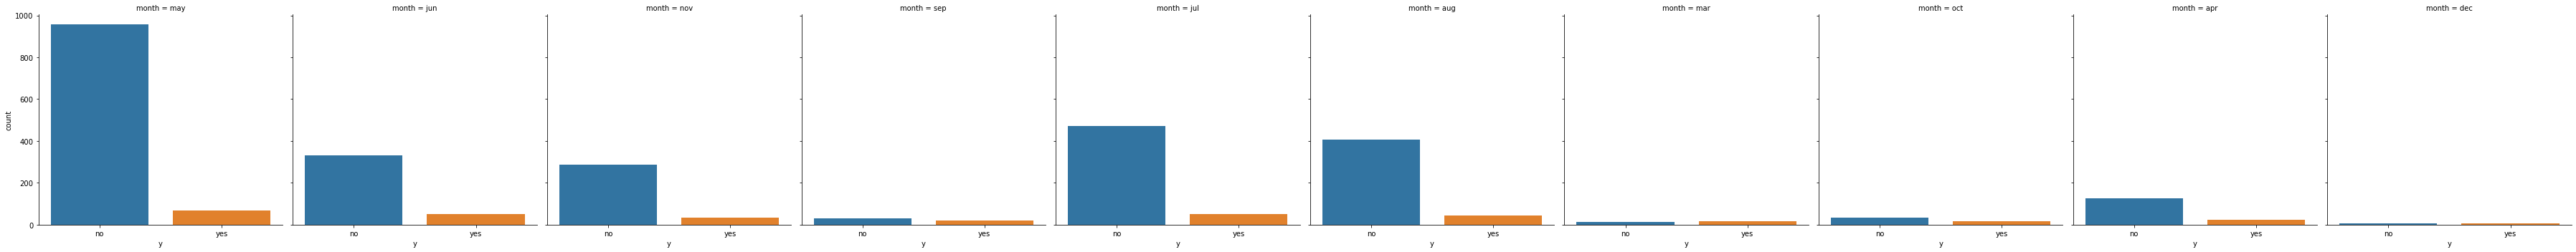

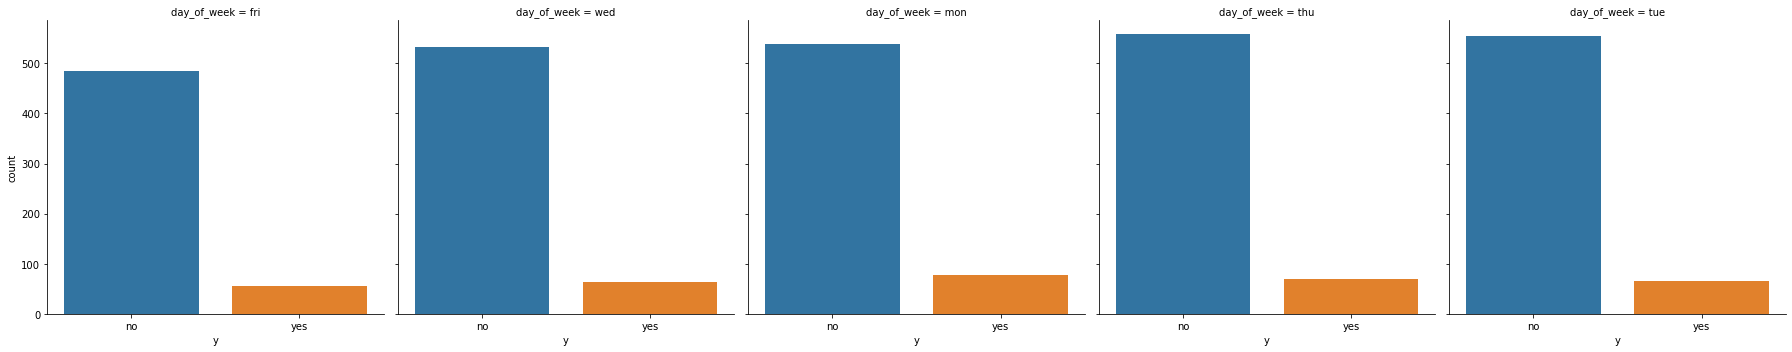

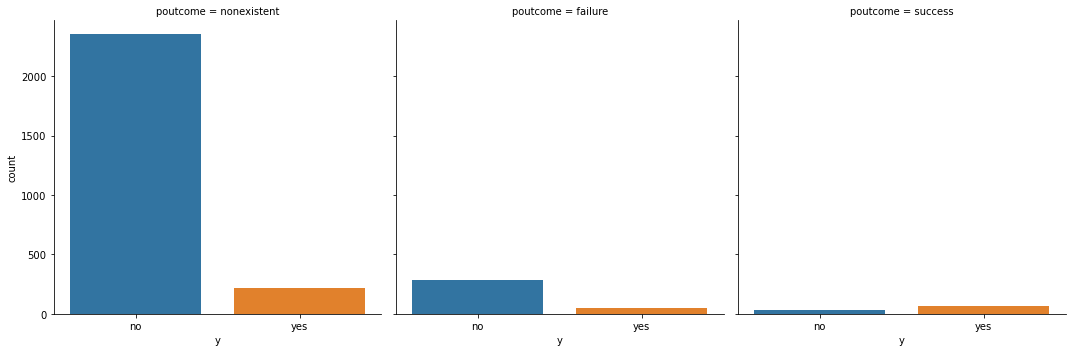

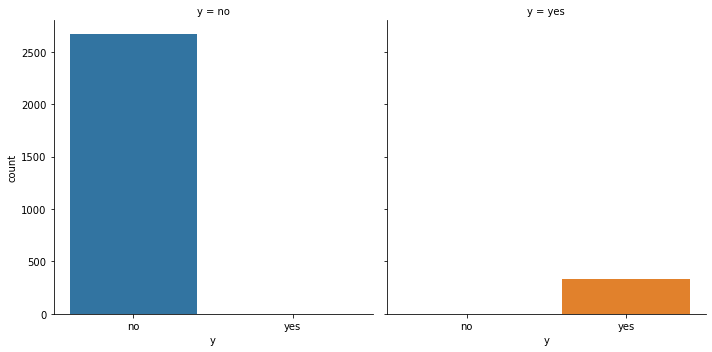

In [22]:
#check target label split over categorical features
#find out the relationship between categorical variable and dependent variable
for categorical_feature in categorical_features:
    sns.catplot(x='y', col=categorical_feature, kind='count' ,data=df)
plt.show()

In [23]:
#check target label split over categorical features and find the count
for categorical_feature in categorical_features:
    print(df.groupby(['y',categorical_feature]).size())
plt.show()    

y    job          
no   admin.           645
     blue-collar      594
     entrepreneur     104
     housemaid         64
     management       214
     retired           91
     self-employed    107
     services         268
     student           46
     technician       435
     unemployed        71
     unknown           29
yes  admin.            98
     blue-collar       50
     entrepreneur       8
     housemaid          6
     management        19
     retired           27
     self-employed      7
     services          26
     student           12
     technician        61
     unemployed        14
     unknown            3
dtype: int64
y    marital 
no   divorced     290
     married     1629
     single       741
     unknown        8
yes  divorced      32
     married      183
     single       115
     unknown        1
dtype: int64
y    education          
no   basic.4y               269
     basic.6y               160
     basic.9y               382
     high.school    

# Explore the Numerical Features

In [24]:
#list of numerical variables
numerical_features = [feature for feature in df.columns if ((df[feature].dtypes != '0') & (feature not in ['y']))]
print('Number of numerical variables: ',len(numerical_features))

#visualize the numerical variables
df[numerical_features].head()

Number of numerical variables:  20


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,487,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1
1,39,services,single,high.school,no,no,no,telephone,may,fri,346,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,227,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,17,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,58,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8


# Find Discrete Numerical Features

In [25]:
discrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 15


# Find Continous Numerical Features 

In [26]:
continous_features=[feature for feature in numerical_features if feature not in discrete_feature+['y']]
print("Continous Feature Count {}".format(len(continous_features)))

Continous Feature Count 5


# Distribution of Continous Numerical Features

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level functi

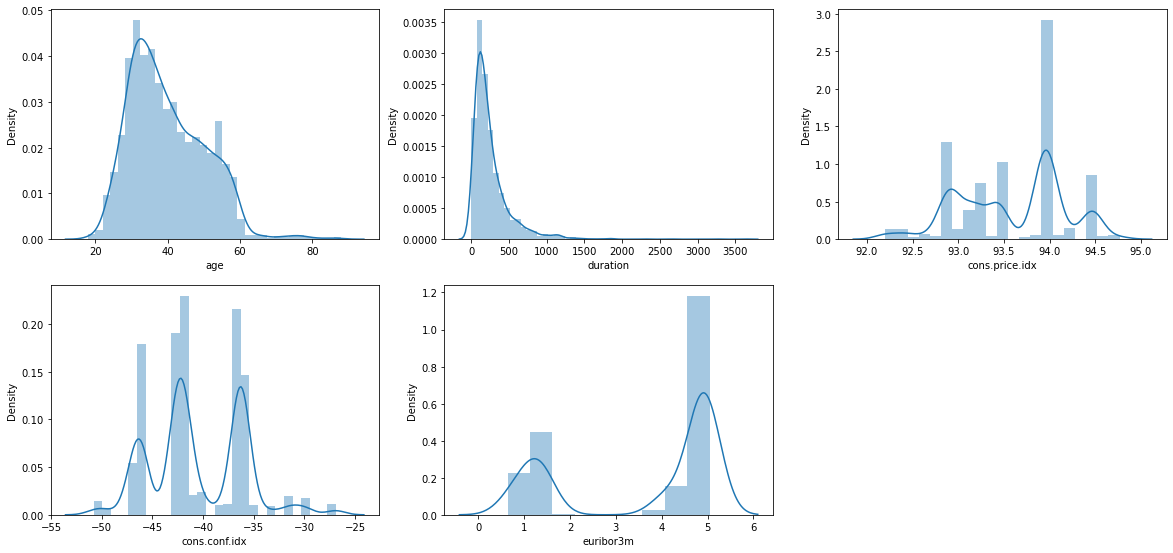

In [27]:
#plot a univariate distribution of continues observations
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for continous_feature in continous_features:
    ax=plt.subplot(12,3,plotnumber)
    sns.distplot(df[continous_feature])
    plt.xlabel(continous_feature)
    plotnumber+=1
plt.show()    

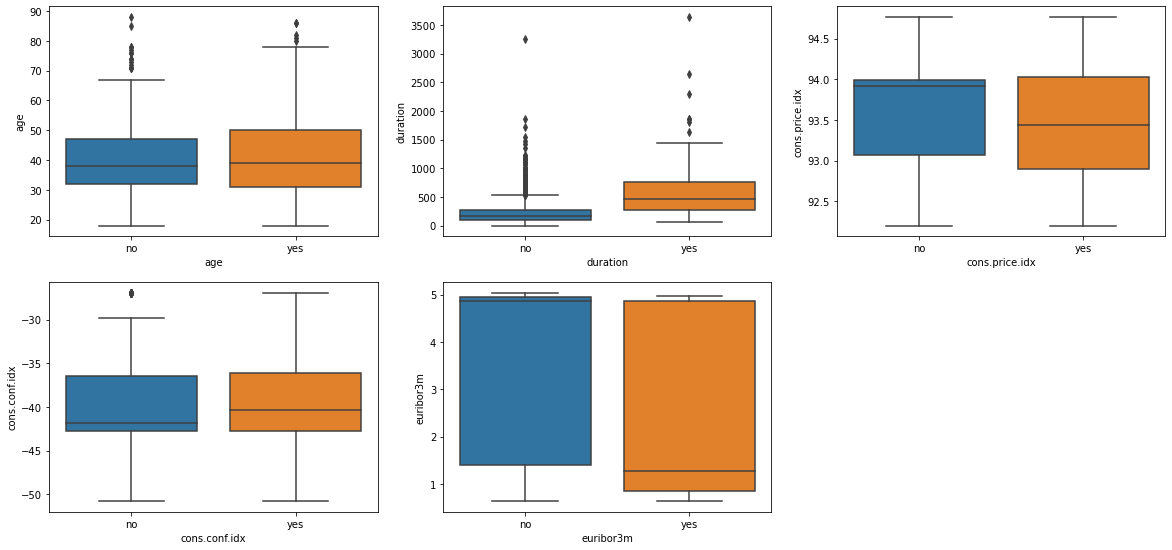

In [28]:
#boxplot to show target distribution with respect numerical features
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for feature in continous_features:
    ax=plt.subplot(12,3,plotnumber)
    sns.boxplot(x='y',y=df[feature], data=df)
    plt.xlabel(feature)
    plotnumber+=1
plt.show()    

# Find Outliners in numeric Features

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


TypeError: Horizontal orientation requires numeric `x` variable.

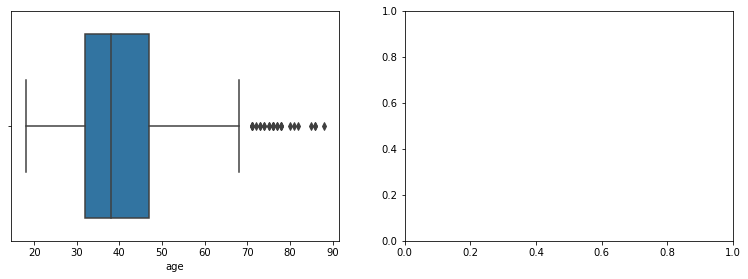

In [29]:
#boxplot on numerical features to find outliners
plt.figure(figsize=(20,60), facecolor='white')
plotnumber=1
for numerical_feature in numerical_features:
    ax=plt.subplot(12,3,plotnumber)
    sns.boxplot(df[numerical_feature])
    plt.xlabel(numerical_feature)
    plotnumber+=1
plt.show()    

# Explore the correlation between numerical features

<AxesSubplot:>

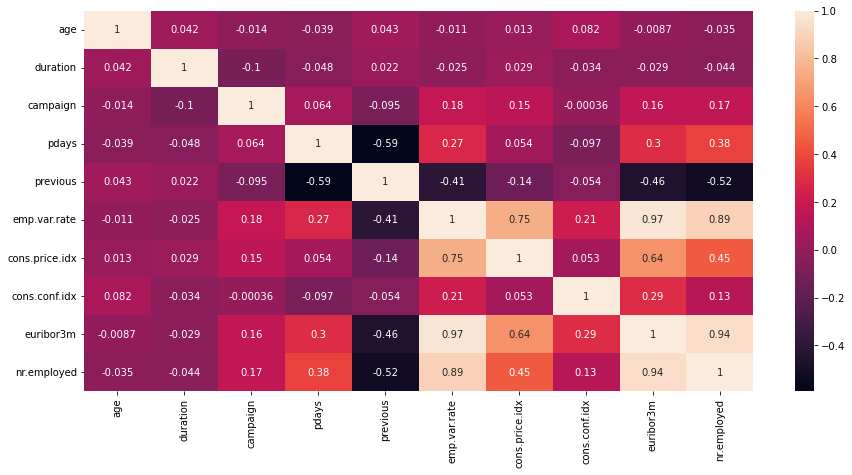

In [30]:
#checking for correlation
cor_mat=df.corr()
fig = plt.figure(figsize=(15,7))
sns.heatmap(cor_mat,annot=True)

# check the data is balanced or not based on target values in classification

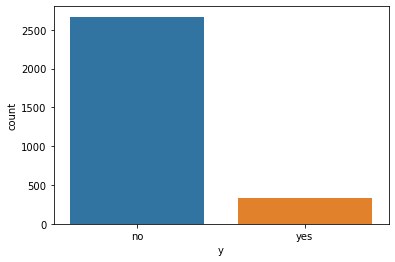

In [31]:
#total patient count based on cardio_results
sns.countplot(x='y',data=df)
plt.show()

In [32]:
df['y'].groupby(df['y']).count()

y
no     2668
yes     331
Name: y, dtype: int64

In [33]:
df2=df.copy()

In [34]:
df2.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [35]:
df2.shape

(2999, 21)

In [36]:
#default features does not play imp role
df2.groupby(['y','default']).size()

y    default
no   no         2114
     unknown     554
yes  no          289
     unknown      42
dtype: int64

In [37]:
df2.drop(['default'],axis=1, inplace=True)

In [38]:
df2.groupby(['y','pdays']).size()

y    pdays
no   1           2
     2           3
     3           9
     4           7
     6           9
     7           2
     9           1
     10          1
     11          1
     12          2
     15          1
     16          1
     18          1
     999      2628
yes  0           1
     3          30
     4           3
     5           4
     6          19
     7           6
     10          4
     12          2
     15          1
     18          1
     999       260
dtype: int64

In [39]:
#drop pdays as it has -1 value for around 40%+
df2.drop(['pdays'],axis=1, inplace=True)

In [40]:
#remove outliers in feature age....
df2.groupby('age',sort=True)['age'].count()
#these can be ignored and values lies in between 18 to 95

age
18    3
19    1
20    3
21    6
22    7
     ..
81    1
82    1
85    1
86    2
88    1
Name: age, Length: 65, dtype: int64

In [41]:
#remove outliers in feature campaign....
df2.groupby(['y','campaign'],sort=True)['campaign'].count()
#these outliers should not be remove as campaign goes high,client show interest on y

y    campaign
no   1           1139
     2            651
     3            356
     4            189
     5             93
     6             72
     7             43
     8             27
     9             20
     10            16
     11            12
     12            11
     13             9
     14             5
     15             2
     16             4
     17            10
     18             1
     19             2
     22             1
     23             2
     24             1
     27             1
     35             1
yes  1            168
     2             85
     3             44
     4             23
     5              6
     6              1
     8              2
     9              1
     11             1
Name: campaign, dtype: int64

In [42]:
df3=df2[df2['campaign'] < 33]

In [43]:
df3.groupby(['y','campaign'],sort=True)['campaign'].count()

y    campaign
no   1           1139
     2            651
     3            356
     4            189
     5             93
     6             72
     7             43
     8             27
     9             20
     10            16
     11            12
     12            11
     13             9
     14             5
     15             2
     16             4
     17            10
     18             1
     19             2
     22             1
     23             2
     24             1
     27             1
yes  1            168
     2             85
     3             44
     4             23
     5              6
     6              1
     8              2
     9              1
     11             1
Name: campaign, dtype: int64

In [44]:
#these outliers in feature previous....
df3.groupby(['y','previous'],sort=True)['previous'].count()

y    previous
no   0           2350
     1            270
     2             38
     3              7
     4              1
     6              1
yes  0            216
     1             71
     2             19
     3             14
     4              8
     5              2
     6              1
Name: previous, dtype: int64

In [45]:
df4=df3[df3['previous'] < 31]

In [46]:
cat_columns = ['job','marital','education','contact','month','poutcome']
for col in cat_columns:
    df4=pd.concat([df4.drop(col, axis = 1),pd.get_dummies(df4[col],prefix=col,prefix_sep='_',drop_first=True,dummy_na=False)])

In [47]:
bool_columns =['housing','loan','y']
for col in bool_columns:
    df4[col+'_new']=df4[col].apply(lambda x : 1 if x=='yes' else 0)
    df4.drop(col,axis=1,inplace=True)

In [48]:
df4.head()

,age,day_of_week,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_nonexistent,poutcome_success,housing_new,loan_new,y_new
0,30.0,fri,487.0,2.0,0.0,-1.8,92.893,-46.2,1.313,5099.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0
1,39.0,fri,346.0,4.0,0.0,1.1,93.994,-36.4,4.855,5191.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
2,25.0,wed,227.0,1.0,0.0,1.4,94.465,-41.8,4.962,5228.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0
3,38.0,fri,17.0,3.0,0.0,1.4,94.465,-41.8,4.959,5228.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
4,47.0,mon,58.0,1.0,0.0,-0.1,93.200,-42.0,4.191,5195.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0
